In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()


'/device:GPU:0'

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-6a1bacc1-4f15-1656-81f7-ce1f8a37e25a)


In [ ]:
!unzip /content/drive/MyDrive/archive.zip -d //content/drive/MyDrive/Dataset

In [ ]:
!ls

drive  sample_data


In [ ]:
import os
FOLDER_PATH = 'Dataset/Images'
ROOT_PATH = '/content/drive/MyDrive/'
print(len(os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH))))

22241


In [ ]:
import numpy as np, pandas as pd
from glob import glob
import shutil, os
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from tqdm.notebook import tqdm
import seaborn as sns
import cv2
from os import listdir
from os.path import isfile, join
import yaml

In [ ]:
import torch
from IPython.display import Image, clear_output

In [ ]:
! git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14197, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 14197 (delta 84), reused 100 (delta 65), pack-reused 14060
Receiving objects: 100% (14197/14197), 13.62 MiB | 9.87 MiB/s, done.
Resolving deltas: 100% (9740/9740), done.


In [ ]:
cd yolov5

/content/yolov5


In [ ]:
pip install -r requirements.txt 

In [ ]:
df = pd.DataFrame()

In [ ]:
#df =  pd.read_csv(content/drive/MyDrive/Dataset/labels_train.csv)

In [ ]:
cd /content/drive/MyDrive/Dataset/

/content/drive/MyDrive/Dataset


In [ ]:
!ls

images	Images	labels	labels_train.csv  labels_trainval.csv  labels_val.csv


In [ ]:
df =  pd.read_csv('labels_train.csv')

In [ ]:
df.frame.value_counts()

1478020419697386200.jpg    31
1478020420204575229.jpg    31
1478020420705248954.jpg    31
1478020419204218613.jpg    30
1478020421703195424.jpg    29
                           ..
1478020798214780235.jpg     1
1478020798715450031.jpg     1
1478020799217516408.jpg     1
1478020799716757297.jpg     1
1478898478846479049.jpg     1
Name: frame, Length: 18000, dtype: int64

In [ ]:
df.describe()

,xmin,xmax,ymin,ymax,class_id
count,132406.000000,132406.000000,132406.000000,132406.000000,132406.000000
mean,202.112223,235.400118,133.525376,162.240148,1.624692
std,114.647213,116.401491,20.508451,28.585448,1.269443
min,0.000000,3.000000,0.000000,0.000000,1.000000
25%,118.000000,150.000000,131.000000,152.000000,1.000000
50%,200.000000,224.000000,139.000000,160.000000,1.000000
75%,280.000000,312.000000,143.000000,171.000000,1.000000
max,475.000000,479.000000,275.000000,299.000000,5.000000


In [ ]:
!ls

images	Images	labels	labels_train.csv  labels_trainval.csv  labels_val.csv


In [ ]:
cd labels/labels_train/

/content/drive/MyDrive/Dataset/labels/labels_train


In [ ]:
!pwd

/content/drive/MyDrive/Dataset/labels/labels_train


In [ ]:
import re

In [ ]:
i=0
while i<132406:
 f_name = df['frame'].iloc[i]
 f_name = re.sub('[.jpg]', '', f_name)
 xmin = df.iloc[i,1]
 xmax = df.iloc[i,2]
 ymin = df.iloc[i,3]
 ymax = df.iloc[i,4]
 height = (ymax-ymin)/300
 xmid = (xmax+xmin)/960
 width = (xmax-xmin)/480
 ymid = (ymax+ymin)/600
 class_id = df.iloc[i,5]-1
 lines = [str(class_id),str(xmid),str(ymid),str(width),str(height)]
 if isfile(f_name+'.txt'):
   with open(f_name+'.txt','a') as f:
    f.write('\n')
    f.writelines('\t'.join(lines)) 
 else:
   with open(f_name+'.txt','w') as f:
     f.writelines('\t'.join(lines))
 i+=1

In [ ]:
FOLDER_PATH = 'Dataset/labels/labels_train'
ROOT_PATH = '/content/drive/MyDrive/'
print(len(os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH))))

18000


In [ ]:
import glob
import os

list_of_files = glob.glob('/content/drive/MyDrive/Dataset/labels_train/*') 
latest_file = max(list_of_files, key=os.path.getctime)
print(latest_file)

/content/drive/MyDrive/Dataset/labels_train/1479506164990616504.txt


In [ ]:
import shutil

In [ ]:
def move_files(source,destination,label_source):
  i=0
  # origin = str(source)
  # destination =  str(destination)

  all_files =  os.listdir(source)
  all_labels = os.listdir(label_source)

  for file_name in all_labels:
    #temp_name = re.sub('[.txt]','.jpg',file_name)
    temp_name = file_name.split('.')[0] + '.jpg'
    i+=1
    #print(temp_name)
    if temp_name in all_files:
      shutil.copy(source+temp_name, destination+temp_name)
    if i%1000==0:
      print('copied'+temp_name)

  # /content/drive/MyDrive/Dataset/labels/labels_train - source for labels
  # /content/drive/MyDrive/Dataset/Images - source
  # /content/drive/MyDrive/Dataset/images/images_train - destination

In [ ]:
import re
source_path =  '/content/drive/MyDrive/Dataset/Images/'
dest_path = '/content/drive/MyDrive/Dataset/images/images_train/'
labels_path = '/content/drive/MyDrive/Dataset/labels/labels_train'
#print (dest_path)
move_files(source_path,dest_path,labels_path)

copied1479506176491553178.jpg
copied1479505398439268165.jpg
copied1479504623888204868.jpg
copied1479503854335723144.jpg
copied1479503048781701598.jpg
copied1479502276220629828.jpg
copied1479501434172656229.jpg
copied1479500151585352241.jpg
copied1479499350530467483.jpg
copied1478899045564925635.jpg
copied1478898353733316888.jpg
copied1478897766447693746.jpg
copied1478897168307214737.jpg
copied1478896594160679973.jpg
copied1478895367601623377.jpg
copied1478732503321948268.jpg
copied1478731925822778182.jpg
copied1478020803717331677.jpg


In [ ]:
!pwd

/content/drive/MyDrive/Dataset/labels/labels_train


In [ ]:
FOLDER_PATH = 'Dataset/images/images_train'
ROOT_PATH = '/content/drive/MyDrive/'
print(len(os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH))))

18000


In [ ]:
origin = '/content/drive/MyDrive/Dataset/images/images_train/'
target = '/content/datasets/images/'


files = os.listdir(origin)


for file_name in files:
   shutil.copy(origin+file_name, target+file_name)
print("Files are copied successfully")

Files are copied successfully


In [ ]:
FOLDER_PATH = '/content/datasets/images'
ROOT_PATH = '/content/datasets'
print(len(os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH))))

18000


In [ ]:
origin = '/content/drive/MyDrive/Dataset/labels/labels_train/'
target = '/content/datasets/labels/'


files = os.listdir(origin)


for file_name in files:
   shutil.copy(origin+file_name, target+file_name)
print("Files are copied successfully")

Files are copied successfully


In [ ]:
FOLDER_PATH = '/content/datasets/labels/'
ROOT_PATH = '/content/datasets'
#print(len(os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH))))
print(len(os.listdir(FOLDER_PATH)))

18000


In [ ]:
cd /content/yolov5

/content/yolov5


In [ ]:
!python train.py --img 640 --cfg custom_yolo5s.yaml --hyp hyp.scratch-med.yaml --batch 32 --epochs 10 --data custom_data.yaml --weights yolov5s.pt --workers 24 --name yolo_road_det

train: weights=yolov5s.pt, cfg=custom_yolo5s.yaml, data=custom_data.yaml, hyp=hyp.scratch-med.yaml, epochs=10, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=runs/train, name=yolo_road_det, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-8-g350e8eb Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, obj=0.7, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, h

In [ ]:
cd yolov5

[Errno 2] No such file or directory: 'yolov5'
/content/yolov5


In [ ]:
#!python detect.py --source /content/datasets/images/
!python detect.py --source /content/drive/MyDrive/Dataset/images/images_train/ --weights /content/drive/MyDrive/Dataset/best.pt --conf 0.25 --name output

In [ ]:
cd /content/yolov5/runs/detect/output5

/content/yolov5/runs/detect/output5


In [ ]:
from PIL import Image, ImageDraw
import random

(-0.5, 479.5, 299.5, -0.5)

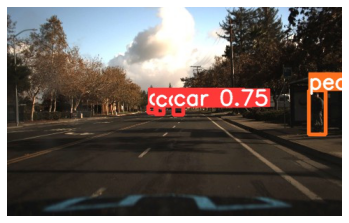

In [ ]:
# detections_dir = "/content/yolov5/runs/detect/output"
# detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

# random_detection_image = Image.open(random.choice(detection_images))
# plt.imshow(np.array(random_detection_image))

detection_image = Image.open('/content/yolov5/runs/detect/output/1478019952686311006.jpg')
plt.imshow(np.array(detection_image))
plt.axis('off')

In [ ]:
%cp /content/yolov5/runs/train/yolo_road_det2/weights/best.pt /content/drive/MyDrive/Dataset/